In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
salmon = xr.open_dataset('/Users/clintonalden/Documents/Research/summa_work/model/output/harts_pass/template_output_harts_WY15_timestep.nc')
salmon2K = xr.open_dataset('/Users/clintonalden/Documents/Research/summa_work/model/output/harts_pass/template_output_harts_+2K_WY15_timestep.nc')
sntl = pd.read_csv('/Users/clintonalden/Documents/Research/summa_work/processing/snotel_csvs/harts_WY15.csv')
sntl['time'] = pd.to_datetime(sntl['time'])


In [5]:
salmon.scalarSWE.max()

<xarray.DataArray 'scalarSWE' ()> Size: 8B
array(935.73869953)

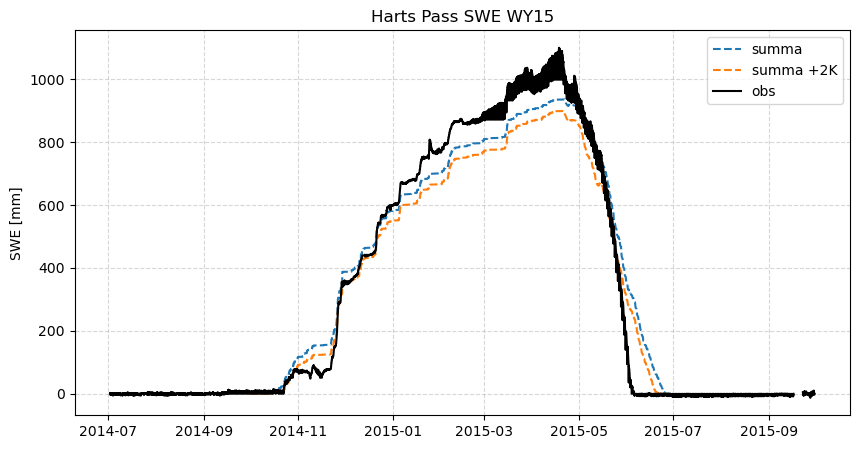

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(salmon.time, salmon.scalarSWE, label='summa', linestyle='--')
ax.plot(salmon2K.time, salmon2K.scalarSWE, label='summa +2K', linestyle='--')
ax.plot(sntl['time'], (sntl['SWE'])*25.4, label='obs', color='black')
ax.set_ylabel('SWE [mm]')
ax.set_title('Harts Pass SWE WY15')
ax.grid(ls='--', alpha=0.5)
ax.legend()

In [4]:
salmon

<xarray.Dataset> Size: 43MB
Dimensions:                    (time: 6553, hru: 1, gru: 1, midToto: 109,
                                midSoil: 9, ifcToto: 110)
Coordinates:
  * time                       (time) datetime64[ns] 52kB 2022-10-01 ... 2023...
  * hru                        (hru) int64 8B 1001
  * gru                        (gru) int64 8B 1001
Dimensions without coordinates: midToto, midSoil, ifcToto
Data variables: (12/51)
    pptrate                    (time, hru) float64 52kB ...
    airtemp                    (time, hru) float64 52kB ...
    SWRadAtm                   (time, hru) float64 52kB ...
    LWRadAtm                   (time, hru) float64 52kB ...
    averageInstantRunoff       (time, gru) float64 52kB ...
    averageRoutedRunoff        (time, gru) float64 52kB ...
    ...                         ...
    scalarSoilBaseflow         (time, hru) float64 52kB ...
    scalarAquiferBaseflow      (time, hru) float64 52kB ...
    scalarTotalRunoff          (time, hru) float64 52kB ...
    scalarNetRadiation         (time, hru) float64 52kB ...
    hruId                      (hru) int64 8B ...
    gruId                      (gru) int64 8B ...
Attributes: (12/34)
    summaVersion:     v3.1.2
    buildTime:        Fri 10 Feb 2023 02:32:58 PM UTC
    gitBranch:        master-0-gfa9adf8
    gitHash:          fa9adf808229a45085defdc2bb8ef05836b9b3aa
    soilCatTbl:       ROSETTA
    vegeParTbl:       MODIFIED_IGBP_MODIS_NOAH
    ...               ...
    compaction:       anderson
    thCondSnow:       smnv2000
    thCondSoil:       funcSoilWet
    spatial_gw:       localColumn
    subRouting:       timeDlay
    snowDenNew:       pahaut_76

In [5]:
frac_wat = salmon.isel(hru=0)['mLayerVolFracWat']

In [6]:
depth = out.isel(hru=0)['iLayerHeight']
temp = out.isel(hru=0)['mLayerTemp']
frac_wat = out.isel(hru=0)['mLayerVolFracWat']

# plot snow depth and layer temperature
plot = psp.layers(frac_wat, depth, colormap='viridis', plot_soil=False, plot_snow=True, add_colorbar=True)
# out['scalarSnowDepth'].plot(color='red', linewidth=2)
plt.title('Salmon Meadows WY23')
# cbar = plt.colorbar(plot)
# cbar.set_label('Snow Temperature [K]')
plt.xlabel('Date')
plt.ylabel('Snow Depth [m]')
plt.grid(ls='--', alpha=0.5)

<xarray.DataArray 'mLayerVolFracWat' (time: 6553, midToto: 109)> Size: 6MB
[714277 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 52kB 2022-10-01 ... 2023-07-01
    hru      int64 8B 1001
Dimensions without coordinates: midToto
Attributes:
    long_name:  volumetric fraction of total water in each layer (instant)
    units:      -